To analyze the A/B testing data for Cookie Cats, we'll perform the following steps in Python using pandas, matplotlib, scipy, and other relevant libraries:

Load the data and inspect its structure and content.
Clean and preprocess the data if necessary (handling missing values, outliers, etc.).
Perform exploratory data analysis to understand the distributions and summary statistics.
Check the assumptions for hypothesis testing (normality and homogeneity of variances).
Conduct hypothesis tests (like the t-test or Mann-Whitney U test) to compare player retention and game rounds between the two groups (gate_30 and gate_40).
Evaluate the results and provide inferences or recommendations based on the analysis.
Let's start by loading the data and taking a look at its first few rows to understand its structure.

The dataset contains the following columns:

1. userid: A unique number that identifies each player.
2. version: Indicates the group to which the player belongs (either gate_30 or gate_40).
3. sum_gamerounds: The number of game rounds played by the player during the first week after installation.
4. retention_1: Whether the player returned to play 1 day after installing (True/False).
5. retention_7: Whether the player returned to play 7 days after installing (True/False).

Next, we will perform data cleaning and preprocessing to ensure the data is in good shape for analysis. Following that, we will conduct exploratory data analysis to summarize the main characteristics of the dataset, and then proceed with hypothesis testing to evaluate the impact of moving the first gate from level 30 to level 40 on player retention and game rounds.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/catsab.csv')

# Display the first few rows of the dataframe
data.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


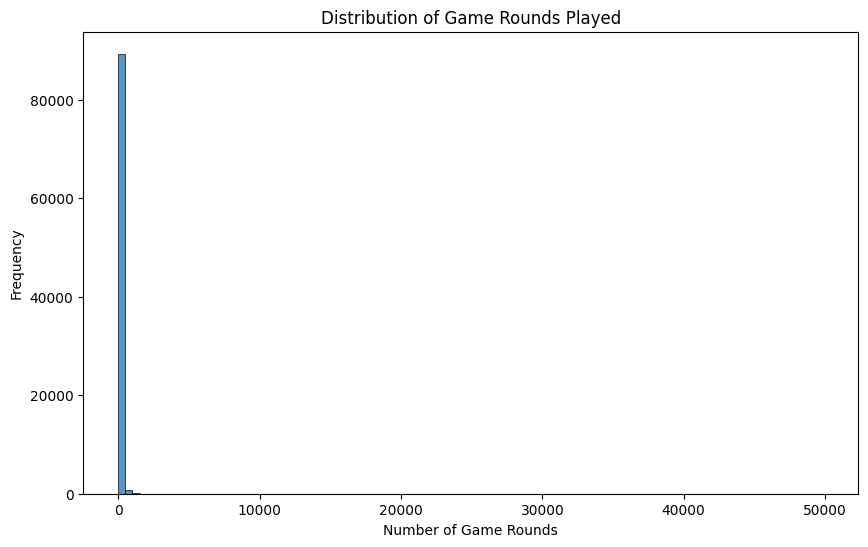

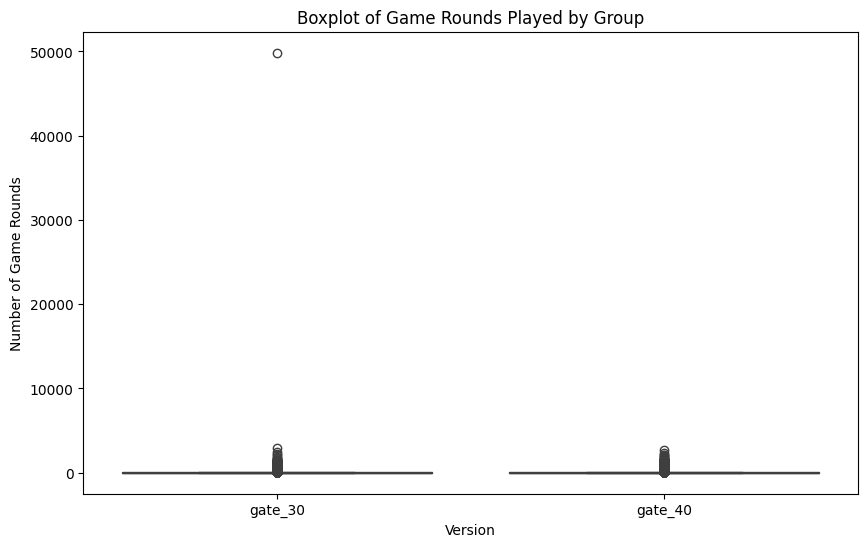

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'missing_values': userid            0
 version           0
 sum_gamerounds    0
 retention_1       0
 retention_7       0
 dtype: int64,
 'describe_gamerounds': count    90189.000000
 mean        51.872457
 std        195.050858
 min          0.000000
 25%          5.000000
 50%         16.000000
 75%         51.000000
 max      49854.000000
 Name: sum_gamerounds, dtype: float64,
 'retention_1_rate': version
 gate_30    0.448188
 gate_40    0.442283
 Name: retention_1, dtype: float64,
 'retention_7_rate': version
 gate_30    0.190201
 gate_40    0.182000
 Name: retention_7, dtype: float64,
 'shapiro_retention_1': ShapiroResult(statistic=0.6318874955177307, pvalue=0.0),
 'shapiro_retention_7': ShapiroResult(statistic=0.47386133670806885, pvalue=0.0),
 'levene_test': LeveneResult(statistic=0.5292002638313259, pvalue=0.46694516772623273)}

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Preprocessing and Cleaning
# Check for missing values
missing_values = data.isnull().sum()

# Check for any obvious outliers or errors in 'sum_gamerounds'
describe_gamerounds = data['sum_gamerounds'].describe()

# Exploratory Data Analysis (EDA)
# Distribution of game rounds
plt.figure(figsize=(10, 6))
sns.histplot(data['sum_gamerounds'], bins=100)
plt.title('Distribution of Game Rounds Played')
plt.xlabel('Number of Game Rounds')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers in 'sum_gamerounds'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['version'], y=data['sum_gamerounds'])
plt.title('Boxplot of Game Rounds Played by Group')
plt.xlabel('Version')
plt.ylabel('Number of Game Rounds')
plt.show()

# Retention rates comparison
retention_1_rate = data.groupby('version')['retention_1'].mean()
retention_7_rate = data.groupby('version')['retention_7'].mean()

# Checking Normality and Homogeneity
# Shapiro-Wilk test for normality
shapiro_retention_1 = stats.shapiro(data['retention_1'].astype(int))
shapiro_retention_7 = stats.shapiro(data['retention_7'].astype(int))

# Levene's test for homogeneity of variances
levene_test = stats.levene(
    data[data['version'] == 'gate_30']['sum_gamerounds'],
    data[data['version'] == 'gate_40']['sum_gamerounds']
)

{
    "missing_values": missing_values,
    "describe_gamerounds": describe_gamerounds,
    "retention_1_rate": retention_1_rate,
    "retention_7_rate": retention_7_rate,
    "shapiro_retention_1": shapiro_retention_1,
    "shapiro_retention_7": shapiro_retention_7,
    "levene_test": levene_test
}


**Data Preprocessing and Cleaning**

No missing values were found in the dataset.
The sum_gamerounds column shows a wide range of values, with a maximum of **49,854 rounds**, indicating potential outliers.
Exploratory Data Analysis (EDA)

The histogram for sum_gamerounds shows a right-skewed distribution, suggesting that most players played fewer rounds, but there are outliers with very high numbers of game rounds.

The boxplot indicates that the distribution of game rounds played has outliers, especially in the gate_30 group.


**Retention Rates**

The retention rate after 1 day (retention_1) is slightly higher for the gate_30 group **(44.82%)** compared to the gate_40 group **(44.23%).**

The retention rate after 7 days (retention_7) is also higher for the gate_30 group **(19.02%)** compared to the gate_40 group **(18.20%)**.


**Checking Normality and Homogeneity**

Shapiro-Wilk tests for retention_1 and retention_7 both resulted in very low p-values, indicating that the data **does not follow a normal distribution**.

Levene's test for homogeneity of variances gives a p-value of **0.467**, suggesting that the variances of game rounds between the two groups are equal.

Given these findings, we can proceed with non-parametric tests for hypothesis testing, given the non-normality of the data. We will use the Mann-Whitney U test to compare the two groups regarding game rounds played and retention rates.

In [4]:
# Hypothesis Testing
# Mann-Whitney U Test for 'sum_gamerounds' between two versions
mwu_gamerounds = stats.mannwhitneyu(
    data[data['version'] == 'gate_30']['sum_gamerounds'],
    data[data['version'] == 'gate_40']['sum_gamerounds'],
    alternative='two-sided'
)

# Mann-Whitney U Test for 'retention_1' between two versions
mwu_retention_1 = stats.mannwhitneyu(
    data[data['version'] == 'gate_30']['retention_1'],
    data[data['version'] == 'gate_40']['retention_1'],
    alternative='two-sided'
)

# Mann-Whitney U Test for 'retention_7' between two versions
mwu_retention_7 = stats.mannwhitneyu(
    data[data['version'] == 'gate_30']['retention_7'],
    data[data['version'] == 'gate_40']['retention_7'],
    alternative='two-sided'
)

{
    "mwu_gamerounds": mwu_gamerounds,
    "mwu_retention_1": mwu_retention_1,
    "mwu_retention_7": mwu_retention_7
}


{'mwu_gamerounds': MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255),
 'mwu_retention_1': MannwhitneyuResult(statistic=1022682813.0, pvalue=0.07441128639919536),
 'mwu_retention_7': MannwhitneyuResult(statistic=1025017239.0, pvalue=0.001554344685704005)}

**Hypothesis Testing Results**

**Game Rounds Played:**

The Mann-Whitney U test gives a p-value of **0.050** for sum_gamerounds, which is marginally above the **0.05** threshold commonly used for statistical significance. This suggests a borderline significant difference in the number of game rounds played between the two groups.


**Retention After 1 Day (retention_1):**

The p-value is** 0.074**, indicating no statistically significant difference in day 1 retention rates between the two versions of the game.


**Retention After 7 Days (retention_7):**

The p-value is **0.0016**, which is well below the** 0.05** threshold, indicating a statistically significant difference in day 7 retention rates between the gate_30 and gate_40 groups.


**Inferences and Recommendations:**

While the number of game rounds played and day 1 retention rates do not show statistically significant differences, the day 7 retention rate is significantly higher for the group with the gate at level 30. This suggests that moving the gate to level 40 could potentially negatively impact player retention in the longer term.

Based on these results, it would be advisable to keep the gate at level 30 to maintain higher retention rates after 7 days, which could be more beneficial for long-term player engagement and potential monetization.